In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn

from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 2 # 设置数据类型为白葡萄酒

# 合并两个df
df = pd.concat([df1,df2],axis=0)

## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]
## 因变量名称
quality = "quality"

In [4]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how='any') # 只要有列为空，就进行删除操作

X = datas[names]
Y = datas[quality]

In [5]:
## 创建模型列表
models = [
    Pipeline([
        ('Poly', PolynomialFeatures()),
        ('Linear', LinearRegression())
    ]),
    Pipeline([
        ('Poly', PolynomialFeatures()),
        ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
    ]),
    Pipeline([
        ('Poly', PolynomialFeatures()),
        ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
    ]),
    Pipeline([
        ('Poly', PolynomialFeatures()),
        ('Linear', ElasticNetCV(alphas=np.logspace(-4, 2, 20),l1_ratio=np.linspace(0, 1, 5)))
    ])
]

线性回归预测:1阶, 截距:104, 系数: [ 0.00000000e+00  8.50118207e-02 -1.48620723e+00 -6.90416760e-02
  6.23516751e-02 -7.18643184e-01  4.99059722e-03 -1.45047299e-03
 -1.03460590e+02  4.97432666e-01  7.21153860e-01  2.23033948e-01
 -3.51639435e-01]
线性回归预测:2阶, 截距:-926, 系数: [-1.53328489e-05 -2.75607377e+01  1.01172114e+02  2.48363269e+02
 -1.75937002e+01 -1.15256738e+03 -2.47657152e+00  9.08814008e-01
  1.51673134e+03  1.22648432e+02  5.79953111e+01  2.03593912e+01
  1.55562601e+01 -4.34318333e-02  3.31320950e-02  4.24739822e-01
 -2.31878257e-02 -2.40247894e+00 -7.35719445e-05  3.64009509e-04
  2.78865437e+01  9.27783430e-02  2.07233708e-01  1.34480741e-02
  5.45491073e-02  4.37670831e-01  8.75879633e-01 -3.84236402e-02
  1.10461091e+00  5.84956237e-03  7.21047498e-03 -1.09383487e+02
  9.44208781e-01  3.90477721e-01  3.15802918e-01 -1.20298473e+00
 -1.04158882e+00  6.70367331e-02  6.55542659e+00  8.39269377e-03
 -5.18668325e-04 -2.58961482e+02  1.54314156e+00 -5.12297705e-01
 -1.24440989e-02  6.56758

Ridge回归预测:2阶, 截距:17, 系数: [ 0.00000000e+00 -4.06711716e+00 -3.30154108e+00 -2.82415203e+00
 -1.22945138e+01  5.59698948e+00 -2.33118238e+00  1.84163540e+00
 -5.12238231e-01 -6.44064089e-01 -1.42645527e+00  5.91308847e+00
 -1.38301035e-01 -2.53179333e-02 -3.07639209e-02  1.48589399e-01
 -9.26883435e-03 -5.77252341e-01 -3.09598632e-04  1.23237527e-03
  4.59956777e+00  3.81999145e-02  1.42485268e-01 -1.16999425e-02
 -1.14696293e-01  1.76209316e-01  7.07768149e-01 -6.05740478e-02
  1.75150321e+00  4.99037554e-03  8.86674924e-03 -2.85549825e+00
  3.63666212e-01 -1.54937719e-01  4.74990550e-01 -1.41368223e+00
 -9.87465901e-01 -2.65851105e-02  5.14742593e+00  1.01822790e-02
 -1.28350356e-03 -2.86221523e+00  2.27246826e-01 -8.14190370e-01
  2.63635627e-01  9.75234106e-01 -7.08886876e-03 -2.27855161e-01
 -1.28486712e-03  8.26413976e-04  1.28979960e+01 -1.27886601e-01
 -5.01257718e-02  1.20360092e-02 -1.04986138e-02  2.16633970e+00
  1.86725098e-02 -5.01373622e-03  5.81887914e+00 -3.54547350e-01


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso回归预测:2阶, 截距:6, 系数: [ 0.00000000e+00  3.63579033e-01 -0.00000000e+00 -0.00000000e+00
  1.01900783e-01  0.00000000e+00 -4.95518209e-02  4.51064454e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.91782929e-01
 -0.00000000e+00 -1.50534103e-02 -1.54964458e-01 -4.77724150e-02
  7.78550773e-03 -0.00000000e+00  7.47394744e-04 -6.87033715e-05
  1.38802197e-01  3.74028713e-02  8.08958906e-02 -1.76044981e-02
 -1.41739052e-01 -0.00000000e+00  0.00000000e+00 -8.71000258e-03
  0.00000000e+00 -2.07149252e-03  6.86527416e-03 -0.00000000e+00
 -4.47269187e-01 -0.00000000e+00  3.24797369e-01 -1.73273975e+00
 -6.62003413e-01 -3.00692997e-02  0.00000000e+00  4.77040995e-03
  1.25381621e-04 -0.00000000e+00 -1.07732952e-01 -6.56978544e-01
  1.41818027e-01  1.35503830e-02 -4.58975291e-04 -9.06291374e-02
 -8.12262474e-04  2.19526430e-04  1.75510205e-02 -4.66625866e-02
 -8.35969108e-03  5.64622459e-04  8.86945356e-03  0.00000000e+00
  1.72695191e-02 -2.13303319e-03  0.00000000e+00  0.00000000e+00
 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso回归预测:3阶, 截距:4, 系数: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordina

 [ 0.00000000e+00 -3.90561217e-04 -1.54502094e+00 -1.02627764e-01
  2.32270541e-02 -8.53392514e-01  5.66252559e-03 -1.81072304e-03
 -4.19137576e-01  1.00980373e-01  5.78686888e-01  3.35621847e-01
 -1.26777255e-01]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alph

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alph

ElasticNet预测:2阶, 截距:9, 系数: [ 0.00000000e+00  3.02044485e-01 -2.58401712e-01 -2.81551068e-01
  1.18507985e-01  4.81673987e-01 -4.95319930e-02  5.18971638e-03
 -2.61396209e-01 -2.98224701e-02 -2.96474510e-02 -2.33270500e-01
  3.86287745e-01 -1.89775532e-02 -1.74253680e-01 -1.27585829e-02
  7.30925241e-03 -5.44128110e-02  6.25081850e-04 -6.26264542e-06
  3.02594943e-01  4.30137338e-02  9.79518448e-02 -1.98949623e-02
 -1.67455794e-01  1.93091392e-01  6.42144715e-01 -6.96138969e-03
  2.42622243e-01 -1.84595673e-03  6.55343103e-03 -2.31469174e-01
 -5.78634411e-01 -8.57075800e-02  3.81053294e-01 -1.62589996e+00
 -8.42413819e-01 -2.74067069e-02  6.34656100e-01  6.27945150e-03
 -6.77208665e-04 -5.05797906e-01 -4.32634830e-01 -7.52316510e-01
  2.27507486e-01  3.75891506e-01 -4.64619386e-04 -1.25806809e-01
 -7.97318637e-04  2.19081014e-04  1.35819327e-02 -4.37993580e-02
 -1.24576233e-02  2.09412094e-04  3.24256237e-03  4.13898699e-01
  1.87884140e-02 -5.91408426e-03  4.39329816e-01  8.33281594e-0

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordina

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alph

ElasticNet预测:3阶, 截距:4, 系数: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+0

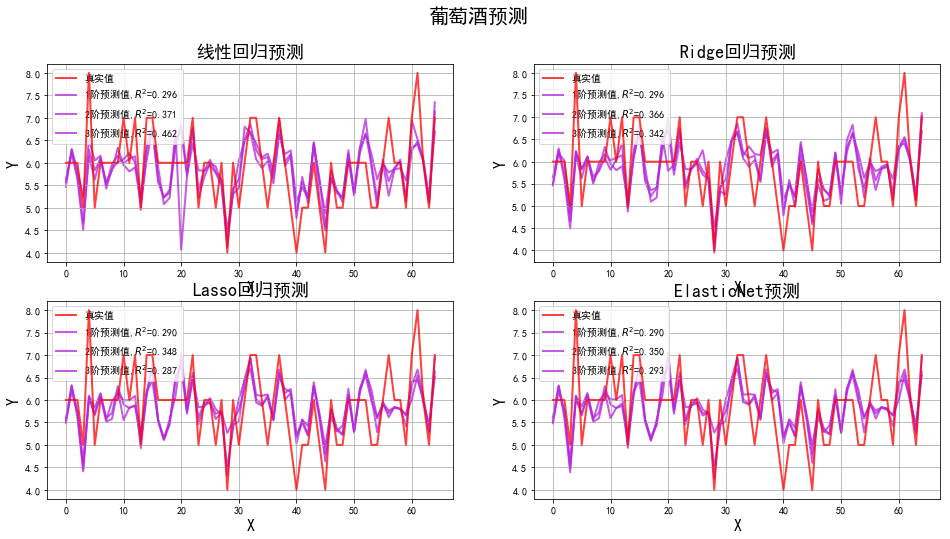

In [23]:
plt.figure(figsize=(16,8), facecolor='w')
titles = '线性回归预测', 'Ridge回归预测', 'Lasso回归预测', 'ElasticNet预测'

## 将数据分为训练数据和测试数据
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

## 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶
m = len(d_pool)
clrs = [] # 颜色
for c in np.linspace(557056, 257056, m):
    clrs.append('#b624db')

for t in range(4):
    plt.subplot(2,2, t+1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r',lw=2,alpha=0.75, zorder=10, label='真实值')
    for i,d in enumerate(d_pool):
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train,Y_train)
        # 模型预测及计算R'2
        Y_pre = model.predict(X_test)
        R = model.score(X_train, Y_train)
        # 输出信息
        lin = model.get_params('Linear')['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output, lin.coef_)
        ## 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2, alpha=0.75, zorder=i, label=u'%d阶预测值,$R^2$=%.3f' %(d,R))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle('葡萄酒预测',fontsize=20)
plt.show()